# Project 2: GDP and Liberal Democracy in Israel

In this project, I explore how Israels economic development and its political regime have changed over time. Specifically, I compare:

- GDP per capita (PPP, constant 2021 international dollars)  
- The Liberal Democracy Index (0–1 scale), produced by V-Dem  

Both datasets come from **Our World in Data (OWID)**, drawing on the **World Bank** (for GDP) and **V-Dem** (for democracy).

The goal is not to make a causal claim, but to practice:
- Loading two different datasets in Python  
- Cleaning and filtering them  
- Merging them by a shared key (Year)  
- Creating a single visualization that displays *both* variables  
- Interpreting the patterns we see  

This notebook walks through each step in a clear, blog-style format, showing intermediate results and even a “dead-end” plot that didn’t fully answer the question.

In [3]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd

# Display current location
print("Current working directory:", os.getcwd())

# Prepare images folder
os.makedirs("images", exist_ok=True)

# Prevent warning spam
warnings.filterwarnings("ignore")

# Plot size
plt.rcParams["figure.figsize"] = (9, 5)

Current working directory: C:\Users\edenk


## Loading the data

I downloaded two CSV files from OWID:

- `GDP.csv` — Israel GDP per capita, PPP  
- `liberal-democracy-index.csv` — V-Dem’s Liberal Democracy Index  

To keep the notebook portable (e.g., for GitHub Pages), I load them using relative file paths.


In [6]:
gdp = pd.read_csv(r"C:\Users\edenk\Documents\Project 2\GDP.csv")
lib = pd.read_csv(r"C:\Users\edenk\Documents\Project 2\liberal-democracy-index.csv")

print("GDP columns:", gdp.columns.tolist())
print("Liberal democracy columns:", lib.columns.tolist())

print("\nGDP preview:")
display(gdp.head())

print("\nLiberal democracy preview:")
display(lib.head())


GDP columns: ['Entity', 'Code', 'Year', 'GDP per capita, PPP (constant 2021 international $)', 'World regions according to OWID']
Liberal democracy columns: ['Entity', 'Code', 'Year', 'Liberal democracy index (central estimate)', 'World regions according to OWID']

GDP preview:


,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)",World regions according to OWID
0,Afghanistan,AFG,2000,1617.8264,NaN
1,Afghanistan,AFG,2001,1454.1108,NaN
2,Afghanistan,AFG,2002,1774.3087,NaN
3,Afghanistan,AFG,2003,1815.9282,NaN
4,Afghanistan,AFG,2004,1776.9182,NaN



Liberal democracy preview:


,Entity,Code,Year,Liberal democracy index (central estimate),World regions according to OWID
0,Afghanistan,AFG,1789,0.029,NaN
1,Afghanistan,AFG,1790,0.029,NaN
2,Afghanistan,AFG,1791,0.029,NaN
3,Afghanistan,AFG,1792,0.029,NaN
4,Afghanistan,AFG,1793,0.029,NaN


## Filtering to Israel only

Both datasets contain many countries. Since this project focuses only on Israel, I filter the rows where `Entity == "Israel"`.


In [8]:
gdp_isr = gdp[gdp["Entity"] == "Israel"].copy()
lib_isr = lib[lib["Entity"] == "Israel"].copy()

print("GDP rows for Israel:", len(gdp_isr))
print("Democracy rows for Israel:", len(lib_isr))

GDP rows for Israel: 35
Democracy rows for Israel: 208


## Selecting and renaming the relevant variables

From each dataset I select two columns:

- `Year`
- GDP per capita OR Liberal Democracy Index

I rename them to shorter, more readable names for later merging.

In [9]:
gdp_col = "GDP per capita, PPP (constant 2021 international $)"
lib_col = "Liberal democracy index (central estimate)"

gdp_isr_clean = gdp_isr[["Year", gdp_col]].rename(
    columns={gdp_col: "gdp_per_capita_ppp"}
)

lib_isr_clean = lib_isr[["Year", lib_col]].rename(columns={lib_col: "lib_dem_index"})

display(gdp_isr_clean.head())
display(lib_isr_clean.head())

,Year,gdp_per_capita_ppp
3131,1990,25335.271
3132,1991,25698.930
3133,1992,26752.400
3134,1993,27123.107
3135,1994,28393.000


,Year,lib_dem_index
14243,1789,0.029
14244,1790,0.029
14245,1791,0.029
14246,1792,0.029
14247,1793,0.029


## Merging the datasets

Now that both datasets are filtered and cleaned, I merge them on `Year`.  
The result is one table containing:

- Year  
- Israel’s GDP per capita  
- Israel’s Liberal Democracy Index  

In [10]:
merged_isr = (
    pd.merge(gdp_isr_clean, lib_isr_clean, on="Year", how="inner")
    .sort_values("Year")
    .reset_index(drop=True)
)

print("Merged shape:", merged_isr.shape)
display(merged_isr.head())

print("\nMissing values:")
print(merged_isr.isna().sum())

display(merged_isr.describe())

Merged shape: (35, 3)


,Year,gdp_per_capita_ppp,lib_dem_index
0,1990,25335.271,0.687
1,1991,25698.930,0.688
2,1992,26752.400,0.689
3,1993,27123.107,0.693
4,1994,28393.000,0.698



Missing values:
Year                  0
gdp_per_capita_ppp    0
lib_dem_index         0
dtype: int64


,Year,gdp_per_capita_ppp,lib_dem_index
count,35.000000,35.000000,35.000000
mean,2007.000000,36287.538029,0.673857
std,10.246951,6695.491652,0.024849
min,1990.000000,25335.271000,0.617000
25%,1998.500000,31356.235000,0.655000
50%,2007.000000,36317.850000,0.688000
75%,2015.500000,41465.523000,0.690500
max,2024.000000,48098.188000,0.700000


## GDP only

As a first attempt, I plot GDP alone.  
It shows steady long-term growth, but it doesn’t answer the question about democracy.  
I keep this plot as part of the assignment requirement: show dead ends and explain why they don't fully solve the problem.

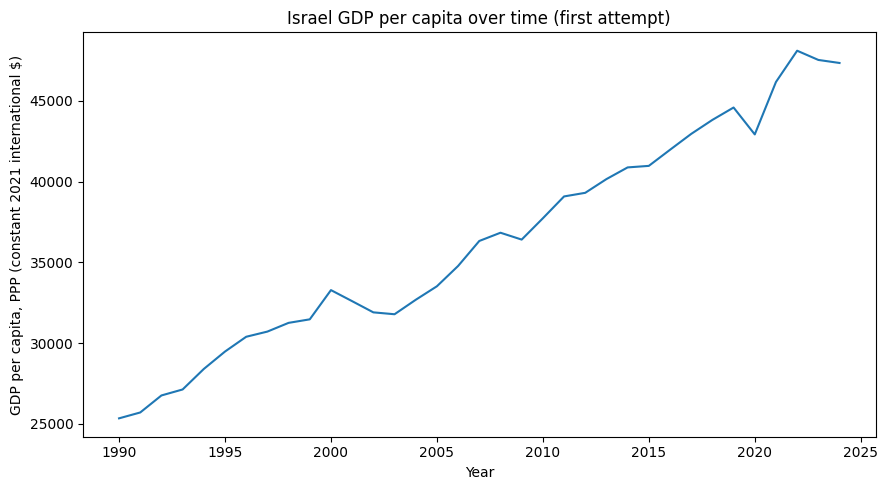

In [11]:
fig, ax = plt.subplots()

ax.plot(merged_isr["Year"], merged_isr["gdp_per_capita_ppp"])

ax.set_title("Israel GDP per capita over time (first attempt)")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per capita, PPP (constant 2021 international $)")

plt.tight_layout()
plt.savefig("images/israel_gdp_only.png", dpi=150)
plt.show()

## Main visualization: GDP and Liberal Democracy together

To answer the research question, I need both variables in the same figure.

I use a dual-axis plot:

- Left axis: GDP per capita  
- Right axis: Liberal Democracy Index  

This allows me to compare trends visually.

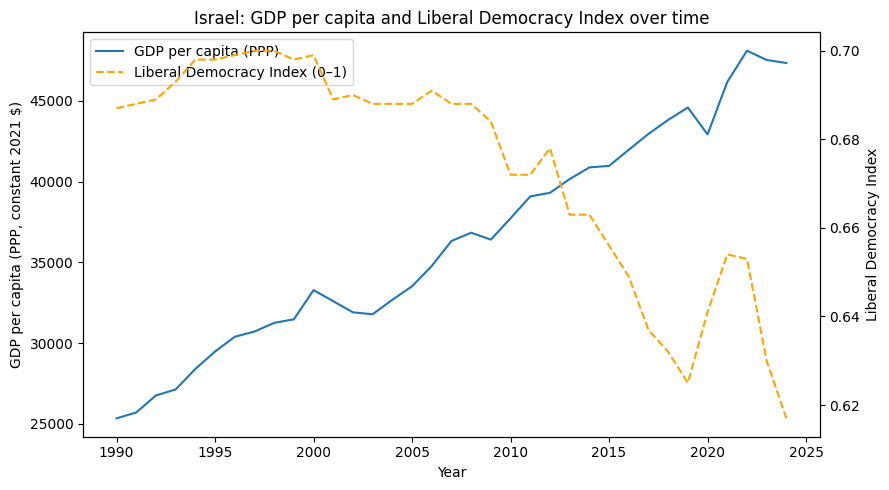

In [12]:
fig, ax1 = plt.subplots()

# GDP on left
ax1.plot(
    merged_isr["Year"],
    merged_isr["gdp_per_capita_ppp"],
    label="GDP per capita (PPP)",
)
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP per capita (PPP, constant 2021 $)")

# Democracy index on right
ax2 = ax1.twinx()
ax2.plot(
    merged_isr["Year"],
    merged_isr["lib_dem_index"],
    linestyle="--",
    color="orange",
    label="Liberal Democracy Index (0–1)",
)
ax2.set_ylabel("Liberal Democracy Index")

# Title + combined legend
plt.title("Israel: GDP per capita and Liberal Democracy Index over time")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.savefig("images/israel_gdp_libdem_timeseries.png", dpi=150)
plt.show()


## Scatter plot: GDP vs Democracy (ignoring time)

Another way to look at the relationship is a scatter plot:

- Each dot = one year  
- X-axis = Liberal Democracy Index  
- Y-axis = GDP per capita  

This doesn’t use time, but it reveals the general association.


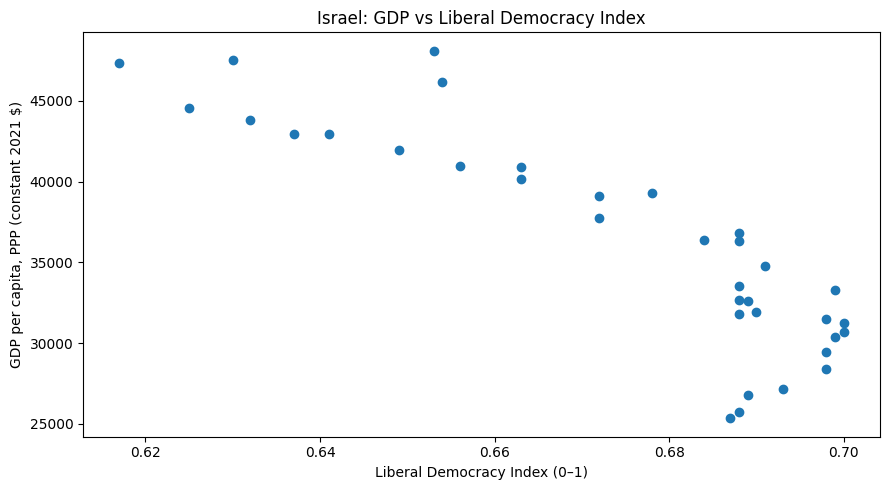

In [13]:
fig, ax = plt.subplots()

ax.scatter(merged_isr["lib_dem_index"], merged_isr["gdp_per_capita_ppp"])

ax.set_xlabel("Liberal Democracy Index (0–1)")
ax.set_ylabel("GDP per capita, PPP (constant 2021 $)")
ax.set_title("Israel: GDP vs Liberal Democracy Index")

plt.tight_layout()
plt.savefig("images/israel_gdp_vs_libdem_scatter.png", dpi=150)
plt.show()


## Correlation summary

As a quick numerical summary, I compute the Pearson correlation between GDP and democracy.

This is **not causal** — it simply shows how the two variables move together.

In [14]:
corr = merged_isr["gdp_per_capita_ppp"].corr(merged_isr["lib_dem_index"])
print(f"Correlation (GDP vs Liberal Democracy): {corr:.3f}")

display(merged_isr.tail())


Correlation (GDP vs Liberal Democracy): -0.874


,Year,gdp_per_capita_ppp,lib_dem_index
30,2020,42915.940,0.641
31,2021,46162.082,0.654
32,2022,48098.188,0.653
33,2023,47527.152,0.630
34,2024,47338.844,0.617


## Takeaways

- Israel’s GDP per capita has increased substantially over time, reflecting sustained long-term economic growth.
- The Liberal Democracy Index shows noticeable fluctuations, with periods of decline that do not align neatly with Israel’s economic trajectory.
- The scatter plot reveals a negative relationship: higher democracy scores tend to appear in periods of lower GDP per capita, and vice versa.- - This correlation is descriptive only — it suggests that economic performance and democratic quality in Israel do not move together in a straightforward way.

## Caveats

- GDP per capita, even in PPP terms, does not reflect income distribution, inequality, or household-level well-being.
- Analyzing a single country limits generalizability. Israel’s political and economic trajectory is shaped by unique factors.
- Correlation does not imply causation. The observed relationship may be driven by underlying time trends, external shocks, or measurement artifacts, not by any direct causal link.

## What I would do next

With more time, I would:
- Incorporate other controls (population, conflict intensity, trade shocks) to reduce omitted-variable bias and better isolate the relationship.
- Compare Israel to other OECD democracies to see whether this negative pattern is unique or part of a broader cross-national trend.
- Examine subcomponents of the V-Dem index (judicial independence, civil liberties, media freedom) to identify which dimensions shift most over time.
- Test for non-linearities or lags (whether changes in democracy affect GDP years later).